2/2 [==============================] - 0s 6ms/step
Mean MAE: 5.8260
Standard Deviation of MSE: 0.9182
Epoch 1/100
26/26 [==============================] - 1s 3ms/step - loss: 1494.4971
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 959.7097
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 294.6774
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 204.6718
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 182.4796
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 165.0637
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 155.5807
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 147.5538
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 143.4375
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 136.7742
Epoch 11/100
26/26 [==============================] - 0s 2ms/step - loss: 12

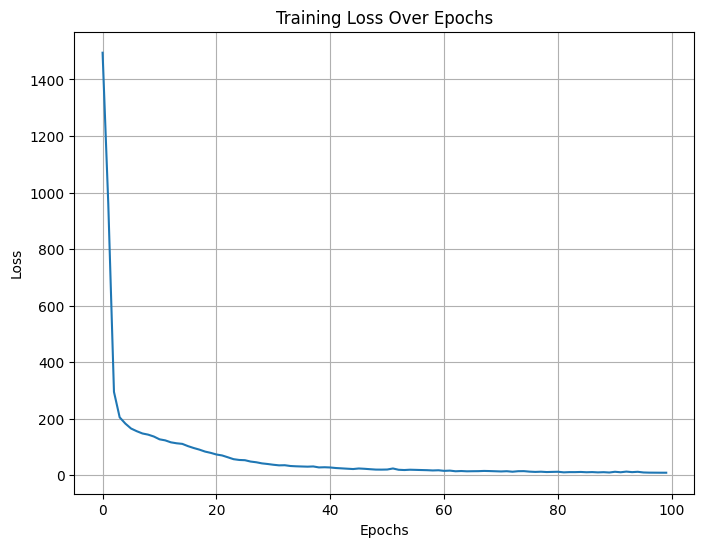

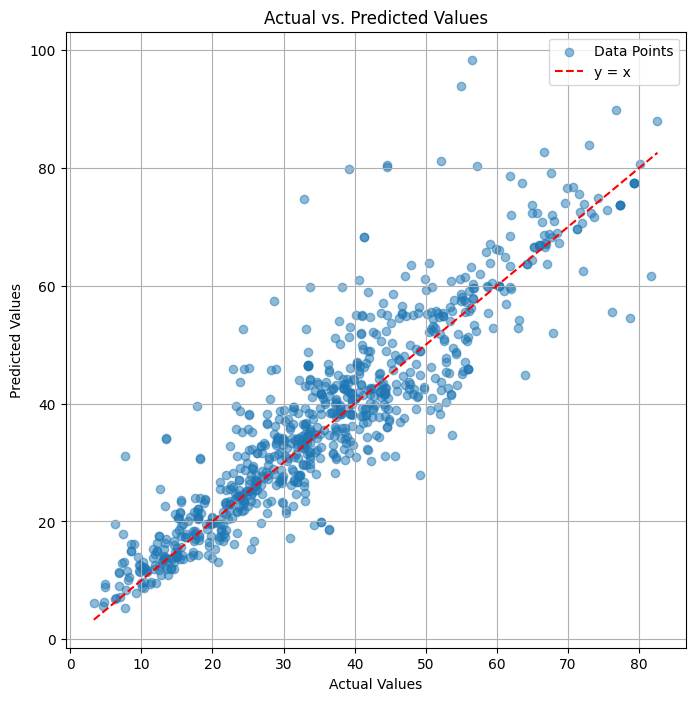

In [ ]:
# USING NEURAL NETWORK FOR COMPRESSIVE STRENGTH PREDICTION

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt


# Load the dataset
train_val_data = pd.read_csv('/content/test.csv')
test_data = pd.read_csv('/content/train-val.csv')

# Extract features and target variable
X_train_val = train_val_data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y_train_val = train_val_data['Concrete compressive strength(MPa, megapascals) ']

X_test = test_data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y_test = test_data['Concrete compressive strength(MPa, megapascals) ']

# Normalize the features
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_val_scaled.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),

        layers.Dense(1)  # Output layer for regression
    ])

    # Compile the model

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Use k-fold cross-validation to evaluate the performance
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
for train_idx, val_idx in kfold.split(X_train_val_scaled):
  X_train, X_val = X_train_val_scaled[train_idx], X_train_val_scaled[val_idx]
  y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

  model = build_model()
  model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

  # Evaluate the model on the validation set
  val_predictions = model.predict(X_val)
  mae = mean_absolute_error(y_val, val_predictions)
  mae_scores.append(mae)


#Print the mean and standard deviation of MSE scores
print("Mean MAE: {:.4f}".format(np.mean(mae_scores)))
print("Standard Deviation of MSE: {:.4f}".format(np.std(mae_scores)))

# Train the final model on the entire training/validation dataset
final_model = build_model()
history = final_model.fit(X_train_val_scaled, y_train_val, epochs=100, batch_size=8, verbose=1)

# Evaluate the final model on the test set
test_predictions = final_model.predict(X_test_scaled)
final_mse = mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error on Test Set: {:.4f}".format(final_mse))
r_squared = r2_score(y_test, test_predictions)
print("R-squared on Test Set: {:.4f}".format(r_squared))

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


#Plotiing Actual values and predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_predictions, alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()





6/6 [==============================] - 0s 3ms/step
Mean MAE (RNN): 4.3345
Standard Deviation of MAE (RNN): 0.4179
Epoch 1/300
103/103 [==============================] - 2s 4ms/step - loss: 697.9862
Epoch 2/300
103/103 [==============================] - 0s 4ms/step - loss: 186.5594
Epoch 3/300
103/103 [==============================] - 0s 4ms/step - loss: 164.7327
Epoch 4/300
103/103 [==============================] - 0s 4ms/step - loss: 154.4814
Epoch 5/300
103/103 [==============================] - 0s 4ms/step - loss: 139.1517
Epoch 6/300
103/103 [==============================] - 0s 4ms/step - loss: 135.4513
Epoch 7/300
103/103 [==============================] - 0s 4ms/step - loss: 125.7217
Epoch 8/300
103/103 [==============================] - 0s 4ms/step - loss: 118.1692
Epoch 9/300
103/103 [==============================] - 0s 4ms/step - loss: 106.9535
Epoch 10/300
103/103 [==============================] - 0s 4ms/step - loss: 100.8410
Epoch 11/300
103/103 [=======================

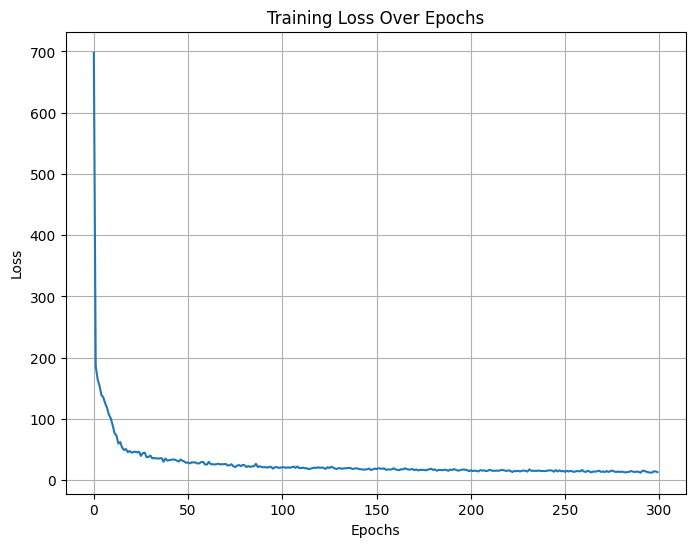

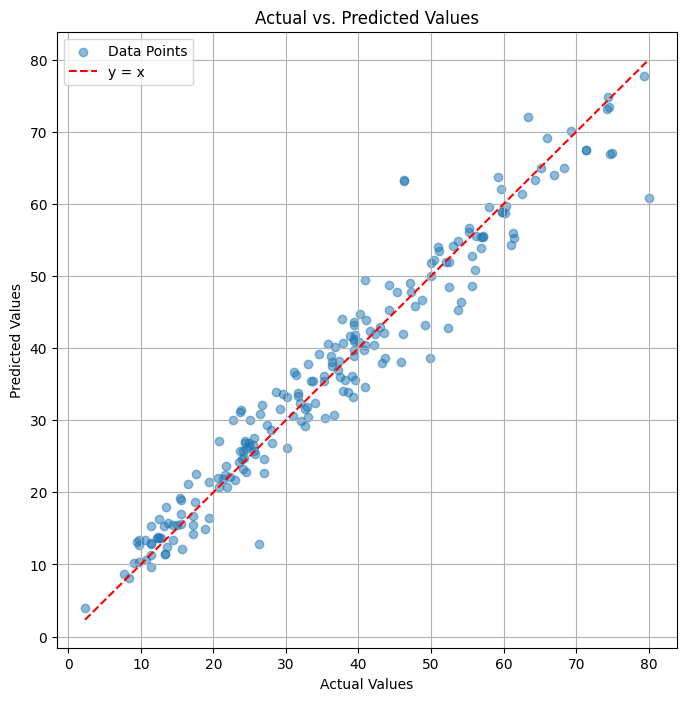

In [ ]:
# USING RNN FOR PREDICTION OF COMPRESSIVE STRENGTH OF CONCRETE



import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import LambdaCallback


# Load the dataset
train_val_data = pd.read_csv('/content/train-val.csv')
test_data = pd.read_csv('/content/test.csv')

# Extract features and target variable
X_train_val = train_val_data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y_train_val = train_val_data['Concrete compressive strength(MPa, megapascals) ']

X_test = test_data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y_test = test_data['Concrete compressive strength(MPa, megapascals) ']

# Normalize the features
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN input (assuming time series nature with sequence length = 1)
X_train_val_reshaped = X_train_val_scaled.reshape((X_train_val_scaled.shape[0], 1, X_train_val_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the RNN model with dropout for regularization
def build_rnn_model():
    model = keras.Sequential([
        layers.SimpleRNN(256, activation='relu', input_shape=(1, X_train_val_scaled.shape[1]), return_sequences=True),
        layers.Dropout(0.2),  # Dropout layer for regularization
        layers.SimpleRNN(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Use k-fold cross-validation to evaluate the performance
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores_rnn = []

for train_idx, val_idx in kfold.split(X_train_val_reshaped):
    X_train, X_val = X_train_val_reshaped[train_idx], X_train_val_reshaped[val_idx]
    y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

    model = build_rnn_model()
    model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

    # Evaluate the model on the validation set
    val_predictions = model.predict(X_val)
    mae = mean_absolute_error(y_val, val_predictions)
    mae_scores_rnn.append(mae)


# Print the mean and standard deviation of MAE scores
print("Mean MAE (RNN): {:.4f}".format(np.mean(mae_scores_rnn)))
print("Standard Deviation of MAE (RNN): {:.4f}".format(np.std(mae_scores_rnn)))

# Train the final RNN model on the entire training/validation dataset
final_rnn_model = build_rnn_model()
history = final_rnn_model.fit(X_train_val_reshaped, y_train_val, epochs=300, batch_size=8, verbose=1)

# Evaluate the final RNN model on the test set
test_predictions = final_rnn_model.predict(X_test_reshaped)
final_mae_rnn = mean_absolute_error(y_test, test_predictions)
print("MAE on Test Set: {:.4f}".format(final_mae_rnn))
r_squared = r2_score(y_test, test_predictions)
print("R-squared on Test Set: {:.4f}".format(r_squared))

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


#Plotiing Actual values and predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_predictions, alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
